# Análisis de ventas de vehículos de segunda mano

Para nuestro proyecto, decidimos hacer un analisis de los datos de publicaciones de ventas de autos usados en toda España

In [ ]:
import pandas as pd
df = pd.read_csv('coches-de-segunda-mano-sample.csv')


In [ ]:
df.head()

# Preprocesamiento
Primero, eliminamos las columnas que no usaremos para acelerar el computo y reducir la cantidad de memoria utilizada

In [ ]:
df.drop(columns=['url', 'company', 'country'], inplace=True)
df.head()

## Calculo del precio medio de venta por cada marca en la muestra

Se considera relevante para el analisis el calculo del  precio medio de venta de todas las marcas de coches con la finalidad de conseguir una visión más clara de cuáles de ellas son las más caras y más baratas en el mercado de coches de segunda mano, kilómetro cero y seminuevos. 

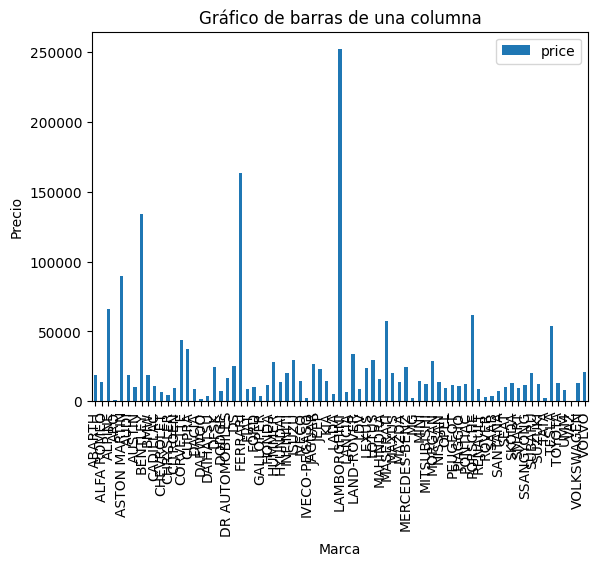

In [ ]:
import matplotlib.pyplot as plt

df2 = df.groupby('make')['price'].mean()

df2.plot(kind='bar', x='make', y='price', legend=True)
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.title('Gráfico de barras de una columna')
plt.show()